<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/12.%20Transfer%20Learning%20Fine%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Thu Sep  2 22:55:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-02 22:55:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-02 22:55:33 (76.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-09-02 22:55:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  85.6MB/s    in 1.9s    

2021-09-02 22:55:37 (85.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [7]:
train_path = "10_food_classes_10_percent/train/"
test_path = "10_food_classes_10_percent/test/"

In [8]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# train_datagen =  ImageDataGenerator(rescale=1/255.,
#                                     rotation_range=0.2, 
#                                     width_shift_range=0.2, 
#                                     height_shift_range=0.2, 
#                                     shear_range=0.2, 
#                                     zoom_range=0.2, 
#                                     channel_shift_range=0.2, 
#                                     horizontal_flip=True, 
#                                     vertical_flip=True)

# test_datagen = ImageDataGenerator(rescale=1/255.

In [10]:
# train_data = train_datagen.flow_from_directory(train_path,
#                                                target_size=(224,224),
#                                                shuffle=True,
#                                                batch_size=32,
#                                                seed=5,
#                                                class_mode="categorical")

# train_data = train_datagen.flow_from_directory(test_path,
#                                                target_size=(224,224),
#                                                shuffle=True,
#                                                batch_size=32,
#                                                seed=5,
#                                                class_mode="categorical")

In [11]:
import tensorflow as tf

IMG_SIZE=(224, 224)
BATCH_SIZE=32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=True,
                                                                 seed=5)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_path,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=True,
                                                                 seed=5)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
# for images, labels in train_data.take(1):
#   print(images, labels)

In [13]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [17]:
# Building transfer learning with Keras Functional API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# create inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# If using ResNet50V2 need to normalize
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass input into base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# average poll the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing inputs through global pooling model: {x.shape}")

# output layer and activation
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after passing inputs through global pooling model: (None, 1280)


In [20]:
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_0 = model_0.fit(train_data,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        epochs=5,
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210902-232014
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 11s 470ms/step - loss: 0.5154 - accuracy: 0.8867 - val_loss: 0.5747 - val_accuracy: 0.8416
Epoch 2/5
24/24 [==============================] - 11s 443ms/step - loss: 0.4606 - accuracy: 0.8947 - val_loss: 0.5464 - val_accuracy: 0.8428
Epoch 3/5
24/24 [==============================] - 11s 441ms/step - loss: 0.4128 - accuracy: 0.9147 - val_loss: 0.5279 - val_accuracy: 0.8460
Epoch 4/5
24/24 [==============================] - 11s 441ms/step - loss: 0.3866 - accuracy: 0.9173 - val_loss: 0.5112 - val_accuracy: 0.8460
Epoch 5/5
24/24 [==============================] - 11s 441ms/step - loss: 0.3457 - accuracy: 0.9307 - val_loss: 0.4979 - val_accuracy: 0.8484


In [23]:
model_0.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 0.4979 - accuracy: 0.8484


[0.4979221820831299, 0.8483999967575073]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [ ]:
base_model.summary()

In [26]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


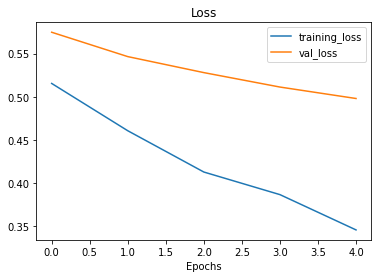

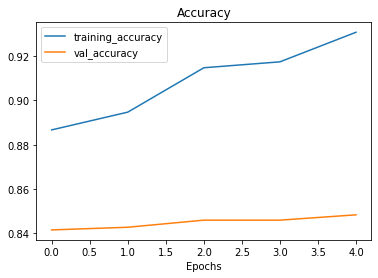

In [28]:
plot_loss_curves(history_0)

In [30]:
# getting feature vector from a trained model
# what does GlobalAveragePooling2D do?
input_shape = (1, 4, 4, 5)

input_tensor = tf.random.normal(shape=input_shape)

output_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

output_tensor.shape

TensorShape([1, 5])

In [31]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[-0.14566469, -0.19771916, -0.19397442, -0.03338762,  0.03946985]],
      dtype=float32)>

In [32]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-09-03 00:04:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   200MB/s    in 0.6s    

2021-09-03 00:04:25 (200 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [33]:
unzip_data("10_food_classes_1_percent.zip")

In [34]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [35]:
train_path = "10_food_classes_1_percent/train/"
test_path = "10_food_classes_1_percent/test/"

In [36]:
IMG_SIZE=(224, 224)
BATCH_SIZE=32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=True,
                                                                 seed=5)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_path,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=True,
                                                                 seed=5)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255)   
], name="data_augmentation_layer")

(-0.5, 400.5, 488.5, -0.5)

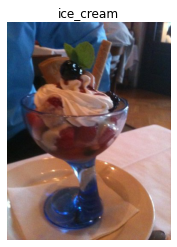

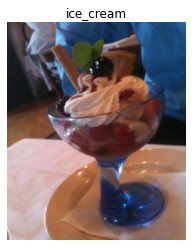

In [63]:
# visualize image and its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))

img = mpimg.imread(target_dir + "/" + random_image)
plt.imshow(img)
plt.title(f"{target_class}")
plt.axis(False)

augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"{target_class}")
plt.axis(False)

In [70]:
# Set up input shape and base model layers
input_shape = (224, 224, 3)

base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation="softmax")(x)

model_1 = keras.Model(inputs, outputs)


In [71]:
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [76]:
checkpoint_path = "one_percent_model_checkpoints_weigth"

checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False, verbose=1)

In [78]:
history_1 = model_1.fit(train_data,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        epochs=5,
                        callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="transfer_learning",
                                                                                experiment_name="1_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_extraction/20210903-010217
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 4s 2s/step - loss: 1.5707 - accuracy: 0.5857 - val_loss: 1.8757 - val_accuracy: 0.3520

Epoch 00001: saving model to one_percent_model_checkpoints_weigth
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 1.4261 - accuracy: 0.6714 - val_loss: 1.8087 - val_accuracy: 0.4013

Epoch 00002: saving model to one_percent_model_checkpoints_weigth
Epoch 3/5
3/3 [==============================] - 3s 2s/step - loss: 1.3273 - accuracy: 0.7429 - val_loss: 1.7380 - val_accuracy: 0.4359

Epoch 00003: saving model to one_percent_model_checkpoints_weigth
Epoch 4/5
3/3 [==============================] - 3s 2s/step - loss: 1.1851 - accuracy: 0.8571 - val_loss: 1.6711 - val_accuracy: 0.4836

Epoch 00004: saving model to one_percent_model_checkpoints_weigth
Epoch 5/5
3/3 [==============================] - 3s 2s/step - loss: 1.1500 - accuracy: 0.8143 - val_loss: 1.6095 - val_accuracy: 0.5181

Epoch 00005: saving model to one_percent_model_checkpoints_we

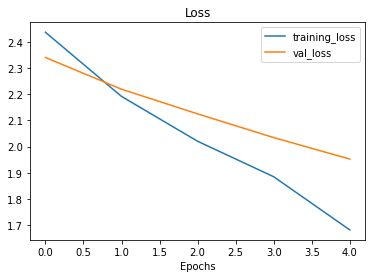

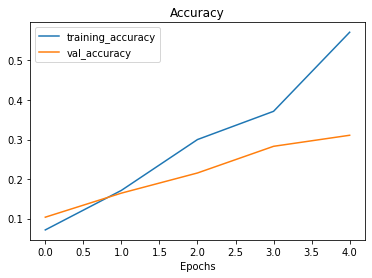

In [73]:
plot_loss_curves(history_1)

In [79]:
model_1.load_weights(checkpoint_path)

In [83]:
#freeze the layers excpt the last 10
base_model.trainable = True

for layer in model_1.layers[2].layers[:-10]:
  layer.trainable = False

In [85]:
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [86]:
# The initial epoch is 5
fine_tune_epochs = 5 + 5

In [87]:
history_2 = model_1.fit(train_data,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_1.epoch[-1], #start training from previous epoch
                        epochs=fine_tune_epochs,
                        callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="transfer_learning",
                                                                                experiment_name="1_percent_feature_fine_tune_last10")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_fine_tune_last10/20210903-011955
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 12s 3s/step - loss: 1.0826 - accuracy: 0.8429 - val_loss: 1.5259 - val_accuracy: 0.5691

Epoch 00005: saving model to one_percent_model_checkpoints_weigth
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.8884 - accuracy: 0.9286 - val_loss: 1.4778 - val_accuracy: 0.5707

Epoch 00006: saving model to one_percent_model_checkpoints_weigth
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.7791 - accuracy: 0.9571 - val_loss: 1.3975 - val_accuracy: 0.6086

Epoch 00007: saving model to one_percent_model_checkpoints_weigth
Epoch 8/10
3/3 [==============================] - 4s 2s/step - loss: 0.7544 - accuracy: 0.9429 - val_loss: 1.3533 - val_accuracy: 0.6036

Epoch 00008: saving model to one_percent_model_checkpoints_weigth
Epoch 9/10
3/3 [==============================] - 3s 1s/step - loss: 0.5981 - accuracy: 0.9571 - val_loss: 1.3421 - val_accuracy: 0.5905

Epoch 00009: saving model to one_percent_model_checkpoin

In [88]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 1.2252 - accuracy: 0.6392


[1.2252076864242554, 0.63919997215271]

In [91]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "transfer learning" \
  --one_shot

2021-09-03 01:25:18.077619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:25:18.084607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:25:18.085118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Priv

In [92]:
! tensorboard dev list

2021-09-03 01:27:47.262872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:27:47.277673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:27:47.278171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/6zrcNRZIQ12WsEqGCEj2lA/
	Name                 transfer learning
	Description          [No Description]
	Id                   6zrcNRZIQ12WsEqGCEj2lA
	Created              2021-09-03 01:25:45 (2 minutes ago)
	Updated              2021-09-03 01:25:49 (2 minutes ago)
	Runs                 8
	Tags            

In [93]:
# how to delete experiment records from tensorboard
! tensorboard dev delete --experiment_id 6zrcNRZIQ12WsEqGCEj2lA

2021-09-03 01:28:26.876169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:28:26.883151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-03 01:28:26.883507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Deleted experiment 6zrcNRZIQ12WsEqGCEj2lA.
